In [1]:
# do an evaluation of the data 
# find what trends are coorolated
# feature engineering 
# check for multicolinearity


In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style='darkgrid')

In [3]:
df = pd.read_csv("happiness.csv")

In [4]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [6]:
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [7]:


for i, col in enumerate(df.columns):
    print(col , "unique values:",df[col].unique())

Y unique values: [0 1]
X1 unique values: [3 5 4 1]
X2 unique values: [3 2 4 5 1]
X3 unique values: [3 2 4 5 1]
X4 unique values: [4 5 3 2 1]
X5 unique values: [2 4 3 5 1]
X6 unique values: [4 3 5 2 1]


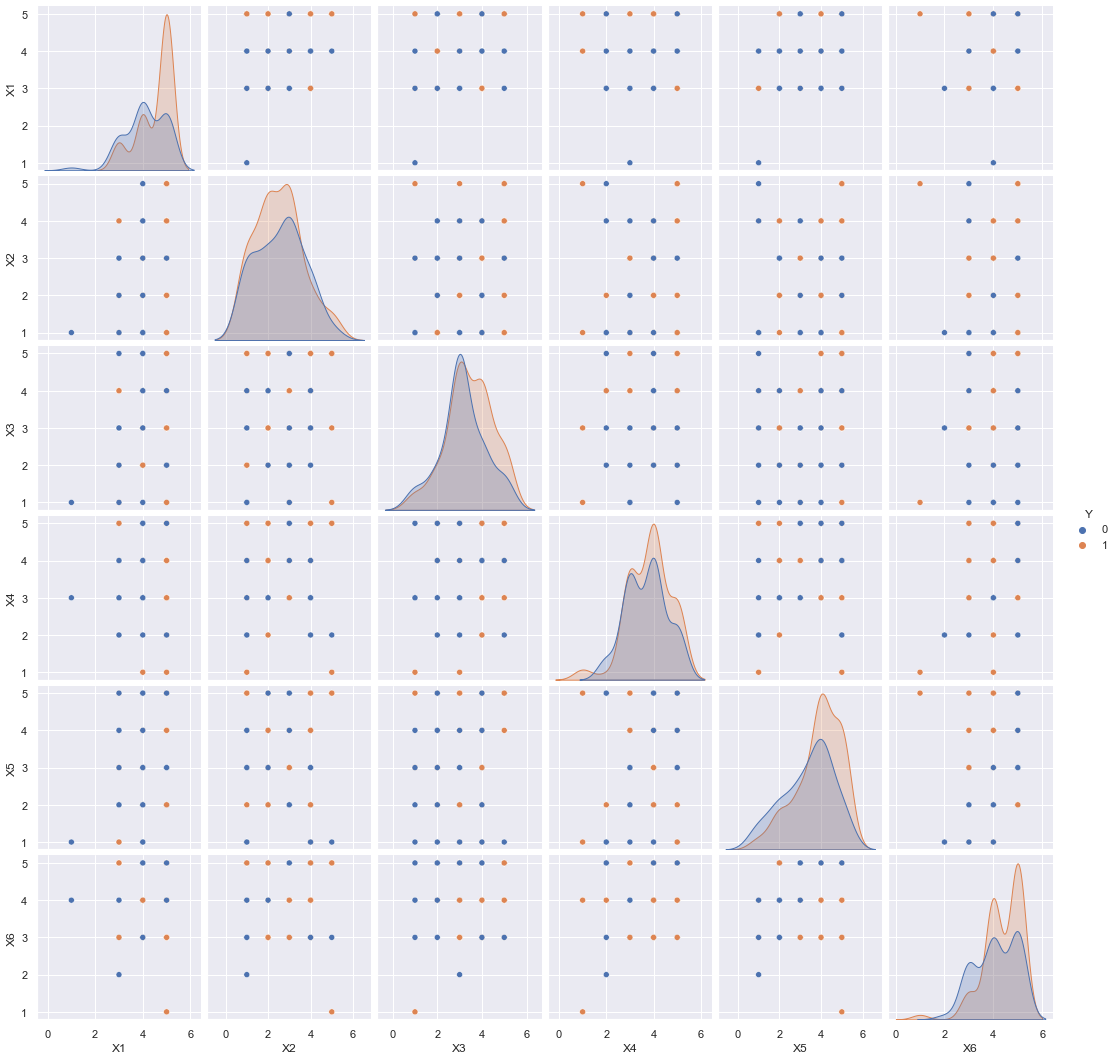

In [8]:
sns.pairplot(df, hue = "Y")

# Plotting The Frequency of Each Value 

In [9]:

for col in df.columns:
    print(" Value Counts ", df[col].value_counts())
    print((50 * "-"))

 Value Counts  1    69
0    57
Name: Y, dtype: int64
--------------------------------------------------
 Value Counts  5    65
4    40
3    20
1     1
Name: X1, dtype: int64
--------------------------------------------------
 Value Counts  3    42
2    34
1    27
4    17
5     6
Name: X2, dtype: int64
--------------------------------------------------
 Value Counts  3    55
4    33
5    17
2    14
1     7
Name: X3, dtype: int64
--------------------------------------------------
 Value Counts  4    53
3    41
5    25
2     5
1     2
Name: X4, dtype: int64
--------------------------------------------------
 Value Counts  4    50
5    31
3    22
2    16
1     7
Name: X5, dtype: int64
--------------------------------------------------
 Value Counts  5    57
4    47
3    20
2     1
1     1
Name: X6, dtype: int64
--------------------------------------------------


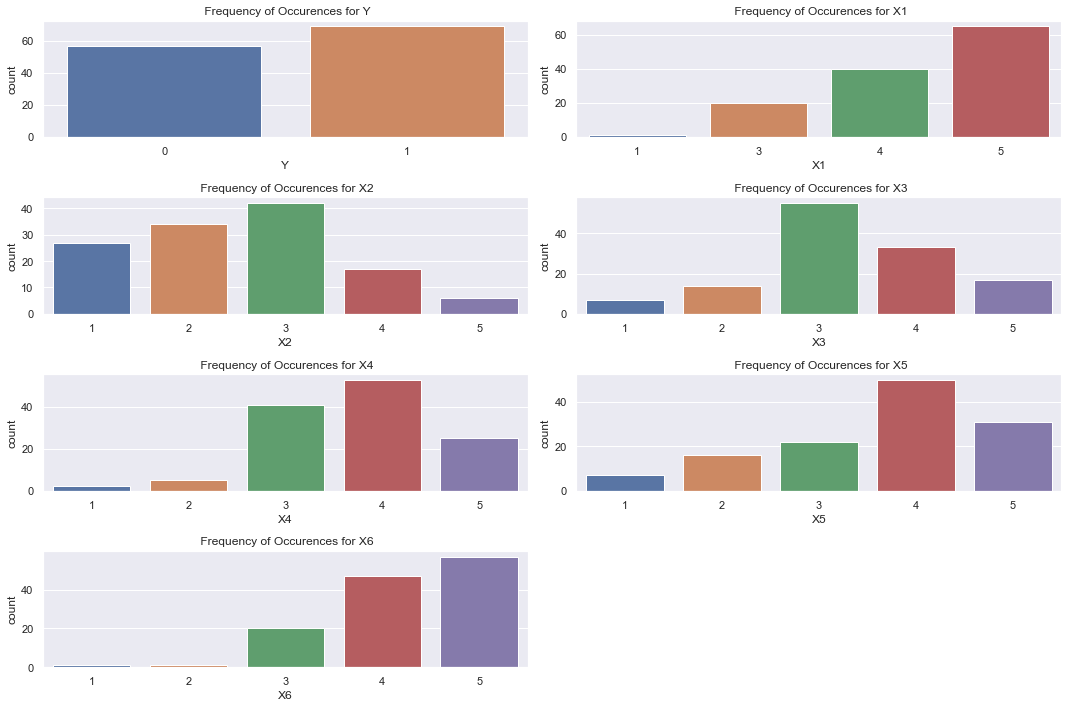

In [10]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns):
    plt.subplot(4,2, i + 1)
    plt.title(" Frequency of Occurences for {}".format(col))
    sns.countplot(data = df, x = df[col])
    plt.tight_layout()

# Coorolations between values Heatmap 

<AxesSubplot:>

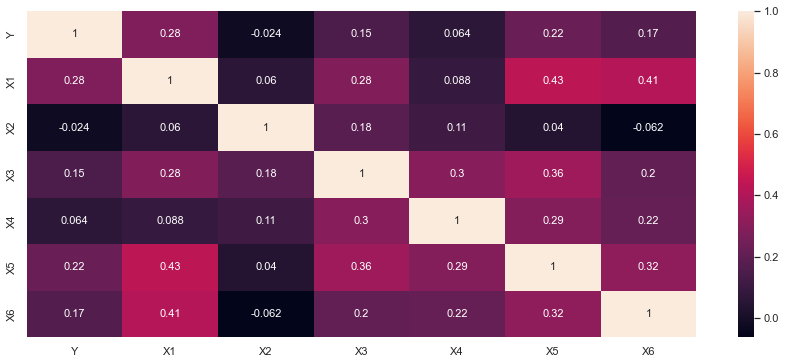

In [11]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(), annot = True, cbar= True, annot_kws=({"size": 11}))

# Feature Selection 

In [12]:
threshold = .3

In [13]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [14]:
# simply these values have a coorolation value above 30% and could be dropped 
correlation(df,threshold)

{'X4', 'X5', 'X6'}

# Univarient Feature Selection 
    - SelectKBest Chi test
    - ExtraTreesClassifier
    - mutual_info_classif


In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# chi2 is applying the statistical analysis 
# A chi-square test is used to help determine if observed results are in line with expected results, and to rule out that observations are due to chance

The Chi-square test is used in statistics to test the independence of two events. More specifically in feature selection, we use it to test whether the occurrence of a specific term and the occurrence of a specific class are independent.
The chi-squared statistic is a single number that tells you how much difference exists between your observed counts and the counts you would expect if there were no relationship at all in the population.



SelectKBest function is used for selecting the K number of top features based on the Chi-square score.


K can be any number depending on the number of features you are dealing with.

In [16]:
X = df.drop("Y", axis = 1)
y = df["Y"]






In [17]:

best_columns = SelectKBest(score_func= chi2, k = 3)
best_columns.fit(X, y)
scores = pd.DataFrame(best_columns.scores_, columns=["Scores"])
df_columns = pd.DataFrame(X.columns)




In [18]:

cols = best_columns.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()

selected_columns


['X1', 'X3', 'X5']

In [19]:
# concat the columns
features_rank = pd.concat([df_columns, scores], axis=1)
# get the n largetst
features_rank.nlargest(3, columns="Scores")

,0,Scores
4,X5,2.273286
0,X1,1.449041
2,X3,0.900104


# Now we will use the Extra Tree Classifier to Select the Best Features 

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
decisions = ExtraTreesClassifier().fit(X, y)

In [22]:
feature_importance_series = pd.Series(decisions.feature_importances_, index = X.columns) 


<AxesSubplot:>

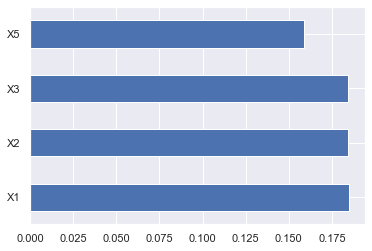

In [23]:
feature_importance_series.nlargest(4).plot(kind = "barh")


# Percentile Selection 
removes all but a user-specified highest scoring percentage of features

using common univariate statistical tests for each feature: false positive rate SelectFpr, false discovery rate SelectFdr, or family wise error SelectFwe.

In [24]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif

In [25]:
selector = SelectPercentile(mutual_info_classif ,percentile=30)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape

(126, 2)

In [26]:
cols = selector.get_support()
cols_selection = X.iloc[:,cols]
cols_selection.columns.to_list()

['X1', 'X6']

In [27]:
from sklearn.feature_selection import mutual_info_classif

In [28]:
selector = mutual_info_classif(X, y)


In [29]:
mutual_info_grid = pd.Series(selector, index= X.columns)
mutual_info_grid.sort_values(ascending= True)

X3    0.000000
X6    0.005363
X2    0.012880
X4    0.030098
X5    0.068638
X1    0.160713
dtype: float64

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import svm

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state= 123 )

In [32]:

SVM_clf = Pipeline([('scale', StandardScaler()),# Scale inputs to 0 mean and 1 variance
                    ('SVM', svm.SVC(kernel='linear', degree=1, gamma='scale'))])

# train the model
SVM_clf=SVM_clf.fit(X_train, y_train)

# preditc the data
y_pred_svm =SVM_clf.predict(X_test)
print('\nAccuracy score to test set: {}\n'.format(round(accuracy_score(y_test, y_pred_svm),2)))



Accuracy score to test set: 0.42



In [33]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# Stacking Model To Make the best Accuracy Possible 

    - Model Stacking is a way to improve model predictions by combining the outputs of multiple models and running them through another machine learning model called a meta-learner.

# Matthews Cooeficient 
Matthews correlation coefficient (MCC) is a metric we can use to assess the performance of a classification model. It is calculated as: MCC = (TP*TN – FP*FN) / √(TP+FP)(TP+FN)(TN+FP)(TN+FN)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)


Model performance for Training set
- Accuracy: 0.77
- MCC: 0.5264707867079121
- F1 score: 0.7704026361857685
----------------------------------
Model performance for Test set
- Accuracy: 0.5
- MCC: 0.07669649888473705
- F1 score: 0.4948148148148149


In [36]:
from sklearn.svm import SVC

svm_rbf = SVC(gamma=2, C=1)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

# Training set performance
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
svm_rbf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 score: %s' % svm_rbf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)
print('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 score: %s' % svm_rbf_test_f1)

Model performance for Training set
- Accuracy: 0.95
- MCC: 0.8964585137568516
- F1 score: 0.9499014420583048
----------------------------------
Model performance for Test set
- Accuracy: 0.38461538461538464
- MCC: -0.06846531968814576
- F1 score: 0.27199597787833085


In [37]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5) # Define classifier
dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)

Model performance for Training set
- Accuracy: 0.83
- MCC: 0.646391462087664
- F1 score: 0.8268266666666668
----------------------------------
Model performance for Test set
- Accuracy: 0.5
- MCC: 0.12339191184909339
- F1 score: 0.47976011994003


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)

Model performance for Training set
- Accuracy: 0.95
- MCC: 0.8994852578458399
- F1 score: 0.9502301790281331
----------------------------------
Model performance for Test set
- Accuracy: 0.5
- MCC: 0.12339191184909339
- F1 score: 0.47976011994003


In [39]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)

Model performance for Training set
- Accuracy: 0.83
- MCC: 0.645920095796421
- F1 score: 0.8288795899152632
----------------------------------
Model performance for Test set
- Accuracy: 0.5384615384615384
- MCC: 0.18446619684315546
- F1 score: 0.5274725274725275


In [40]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm_rbf),
    ('dt',dt),
    ('rf',rf),
    ('mlp',mlp) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator= LogisticRegression()
)

# Train stacked model

stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 0.95
- MCC: 0.8964585137568516
- F1 score: 0.9499014420583048
----------------------------------
Model performance for Test set
- Accuracy: 0.38461538461538464
- MCC: -0.06846531968814576
- F1 score: 0.27199597787833085


In [41]:
acc_train_list = {'knn':knn_train_accuracy,
'svm_rbf': svm_rbf_train_accuracy,
'dt': dt_train_accuracy,
'rf': rf_train_accuracy,
'mlp': mlp_train_accuracy,
'stack': stack_model_train_accuracy}

mcc_train_list = {'knn':knn_train_mcc,
'svm_rbf': svm_rbf_train_mcc,
'dt': dt_train_mcc,
'rf': rf_train_mcc,
'mlp': mlp_train_mcc,
'stack': stack_model_train_mcc}

f1_train_list = {'knn':knn_train_f1,
'svm_rbf': svm_rbf_train_f1,
'dt': dt_train_f1,
'rf': rf_train_f1,
'mlp': mlp_train_f1,
'stack': stack_model_train_f1}

In [42]:
mcc_train_list

{'knn': 0.5264707867079121,
 'svm_rbf': 0.8964585137568516,
 'dt': 0.646391462087664,
 'rf': 0.8994852578458399,
 'mlp': 0.645920095796421,
 'stack': 0.8964585137568516}

In [43]:
import pandas as pd

acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df

,Accuracy,MCC,F1
knn,0.77,0.526471,0.770403
svm_rbf,0.95,0.896459,0.949901
dt,0.83,0.646391,0.826827
rf,0.95,0.899485,0.950230
mlp,0.83,0.645920,0.828880
stack,0.95,0.896459,0.949901


In [44]:
df.to_csv('results.csv')

# Conclusions about the Model 
- Stacking the Models together to make the best Estimator Possible... models used -> KNN, SVM_rbf, dt, rf, mlp, stack
- The Stacked Model came out to about 95% accurate 
- Percentile 30% features X1 and X4 
- ExtraTreesClassifier X1, X2, X3, X5
- SelectKBest with chi2 statistic X1, X5, X3